#Импортируем всякое разное (A)
(в этом разделе импортируем всякие библиотечки)

In [1]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import warnings

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

#Подгружаем данные (B)
(в этом разделе импортируем данные, немного корректируем исходную табличку и понимаем, с чем имеем дело)

In [2]:
df = pd.read_csv('/content/Drom_data.csv')
df.head()

,Unnamed: 0,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,...,0_Характеристики совпадают с ПТС,0_Цвет не совпадает с ПТС,1_3-6 записей о регистрации,1_более 6 записей о регистрации,2_Стоит на учете в ГИБДД,3_Не был во владении у юр. лица,4_Последний период владения до 1 года,4_Последний период владения до 6 лет,Ссылка,Название машины
0,0,1350000,122.0,86684.0,1.8,2018,0,1,0,1,...,1,0,0,0,1,1,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/5...,Лада Веста Кросс
1,1,1350000,122.0,77400.0,1.8,2019,0,0,1,1,...,1,0,0,0,1,1,0,1,https://auto.drom.ru/moscow/lada/vesta/2447192...,Лада Веста
2,2,950000,90.0,9200.0,1.6,2023,0,1,0,1,...,1,0,0,0,1,1,0,0,https://auto.drom.ru/moscow/lada/granta/290328...,Лада Гранта
3,4,1165000,122.0,84594.0,1.8,2019,0,0,1,1,...,0,0,0,0,0,0,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/9...,Лада Веста Кросс
4,7,1145000,122.0,58195.0,1.8,2019,0,1,0,1,...,1,0,0,0,0,1,0,1,https://auto.drom.ru/moscow/lada/vesta/6242073...,Лада Веста


In [3]:
#в первом столбике стоят индексы ранней версии таблицы, сейчас индексация новая, поэтому дропнем его
#код нельзя перепрогонять, иначе столбцы будут удаляться и дальше
del df[df.columns[0]]
df.head()

,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,Привод_задний,...,0_Характеристики совпадают с ПТС,0_Цвет не совпадает с ПТС,1_3-6 записей о регистрации,1_более 6 записей о регистрации,2_Стоит на учете в ГИБДД,3_Не был во владении у юр. лица,4_Последний период владения до 1 года,4_Последний период владения до 6 лет,Ссылка,Название машины
0,1350000,122.0,86684.0,1.8,2018,0,1,0,1,0,...,1,0,0,0,1,1,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/5...,Лада Веста Кросс
1,1350000,122.0,77400.0,1.8,2019,0,0,1,1,0,...,1,0,0,0,1,1,0,1,https://auto.drom.ru/moscow/lada/vesta/2447192...,Лада Веста
2,950000,90.0,9200.0,1.6,2023,0,1,0,1,0,...,1,0,0,0,1,1,0,0,https://auto.drom.ru/moscow/lada/granta/290328...,Лада Гранта
3,1165000,122.0,84594.0,1.8,2019,0,0,1,1,0,...,0,0,0,0,0,0,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/9...,Лада Веста Кросс
4,1145000,122.0,58195.0,1.8,2019,0,1,0,1,0,...,1,0,0,0,0,1,0,1,https://auto.drom.ru/moscow/lada/vesta/6242073...,Лада Веста


In [4]:
#теперь давайте поймем, как выглядят признаки каждого объекта
df.loc[0].tolist()

[1350000,
 122.0,
 86684.0,
 1.8,
 2018,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 'https://auto.drom.ru/moscow/lada/vesta_cross/553824953.html',
 'Лада Веста Кросс']

Заметим, что это несколько количественных переменных (3 штуки и цена), год покупки автомобиля, ссылка на объявление, название автомобиля и много бинарных переменных

#Первичный анализ данных (C)
(в этом разделе уже внимательнее смотрим на данные и делаем предварительные преобразования для того, чтобы в дальнейшем можно было строить регрессии и всякое разное)

In [5]:
#сначала посмотрим, какие масштабы данных для понимания, с чем будем работать
df.describe()

,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,Привод_задний,...,0_Модель не совпадает с ПТС,0_Мощность двигателя не совпадает с ПТС,0_Характеристики совпадают с ПТС,0_Цвет не совпадает с ПТС,1_3-6 записей о регистрации,1_более 6 записей о регистрации,2_Стоит на учете в ГИБДД,3_Не был во владении у юр. лица,4_Последний период владения до 1 года,4_Последний период владения до 6 лет
count,6.410000e+02,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,...,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,8.269794e+05,97.541342,106336.375975,1.613417,2016.531981,0.068643,0.825273,0.068643,0.934477,0.00624,...,0.012480,0.004680,0.942278,0.039002,0.224649,0.067083,0.716069,0.861154,0.193448,0.556942
std,3.958286e+05,12.755217,79313.194940,0.069424,6.061352,0.253043,0.380030,0.253043,0.247639,0.07881,...,0.111104,0.068305,0.233400,0.193750,0.417677,0.250361,0.451256,0.346055,0.395309,0.497135
min,6.000000e+04,59.000000,69.000000,1.200000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000e+05,87.000000,46749.000000,1.600000,2014.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.750000e+05,98.000000,89589.000000,1.600000,2018.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.115000e+06,106.000000,152000.000000,1.600000,2021.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,2.150000e+06,122.000000,400000.000000,1.800000,2024.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#теперь посмотрим, какие признаки есть у автомобилей
df.columns

Index(['Цена', 'Мощность', 'Пробег', 'Объём двигателя', 'Год',
       'Коробка передач_вариатор', 'Коробка передач_механика',
       'Коробка передач_робот', 'Привод_передний', 'Привод_задний',
       'Тип кузова_джип/suv 5 дв.', 'Тип кузова_лифтбек', 'Тип кузова_минивэн',
       'Тип кузова_седан', 'Тип кузова_универсал', 'Тип кузова_хэтчбек 3 дв.',
       'Тип кузова_хэтчбек 5 дв.', 'Цвет_бордовый', 'Цвет_голубой',
       'Цвет_желтый', 'Цвет_зеленый', 'Цвет_золотистый', 'Цвет_коричневый',
       'Цвет_красный', 'Цвет_оранжевый', 'Цвет_серебристый', 'Цвет_серый',
       'Цвет_синий', 'Цвет_фиолетовый', 'Цвет_черный', 'Цвет_белый',
       '0_Модель не совпадает с ПТС',
       '0_Мощность двигателя не совпадает с ПТС',
       '0_Характеристики совпадают с ПТС', '0_Цвет не совпадает с ПТС',
       '1_3-6 записей о регистрации', '1_более 6 записей о регистрации',
       '2_Стоит на учете в ГИБДД', '3_Не был во владении у юр. лица',
       '4_Последний период владения до 1 года',
       '

Также следует отметить, что в процессе парсинга данных в каждой группе одна из дамми была "дропнута", чтобы избежать линейной связи между признаками, поэтому в дополнении к указанным колонкам есть еще следующий список: ***'0_Год не совпадает с ПТС', '1_1-2 записей о регистрации', '2_Не стоит на учете в ГИБДД', '3_Был во владении у юр. лица', '4_Последний период владения больше 6 лет', 'Коробка передач_АКПП', 'Привод_4WD', 'Тип кузова_джип/suv 3 дв.', 'Цвет_бежевый'.***

Данная особенность сбора данных не влияет на дальнейший анализ, потому что не меняет возможные принимаемые значения, однако ее следует принять к рассмотрению в процессе спецификации модели и размышлениях о релевантности переменных.

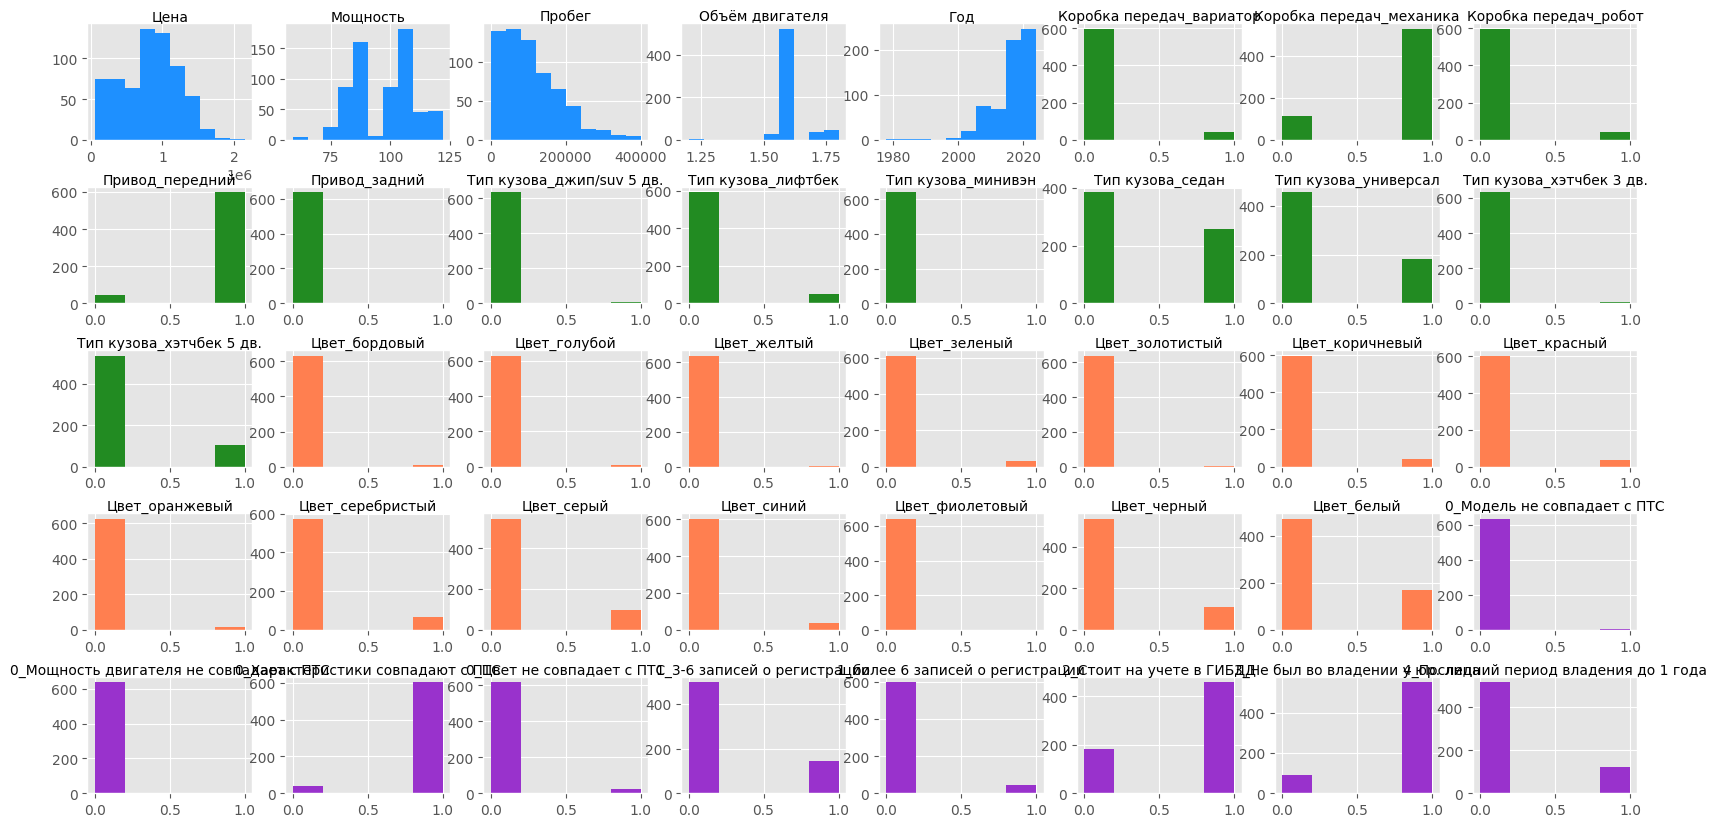

In [36]:
#теперь посмотрим, как некоторые из наших данных выглядят визуально,
#более адекватно это будет сильно ниже, потому что нужны масштабные преобразования
cout = 0
l = ['Тип', 'Кор', 'При']
c = ['0', '1', '2', '3', '4']
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(20, 10))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
for i in range(5):
    for j in range(8):
        ax = axes[i, j]
        if (df.drop('Ссылка', axis=1).columns[cout][:2]=='Цв'):
          ax.hist(df.drop('Ссылка', axis=1)[df.drop('Ссылка', axis=1).columns[cout]], bins=5, color='coral')
          ax.set_title(df.drop('Ссылка', axis=1).columns[cout], fontsize=10, pad=-10)

        elif (df.drop('Ссылка', axis=1).columns[cout][:3] in l):
          ax.hist(df.drop('Ссылка', axis=1)[df.drop('Ссылка', axis=1).columns[cout]], bins=5, color='forestgreen')
          ax.set_title(df.drop('Ссылка', axis=1).columns[cout], fontsize=10, pad=-10)

        elif (df.drop('Ссылка', axis=1).columns[cout][:1] in c):
          ax.hist(df.drop('Ссылка', axis=1)[df.drop('Ссылка', axis=1).columns[cout]], bins=5, color='darkorchid')
          ax.set_title(df.drop('Ссылка', axis=1).columns[cout], fontsize=10, pad=-10)

        else:
          ax.hist(df.drop('Ссылка', axis=1)[df.drop('Ссылка', axis=1).columns[cout]], bins=10, color='dodgerblue')
          ax.set_title(df.drop('Ссылка', axis=1).columns[cout], fontsize=10, pad=-10)
        cout+=1

# Показываем графики
plt.show()

Заметим, что цена более менее нормальная со скосом влево, мощность бимодальная, а пробег логнормальный. В бинарных переменных очень много дизбаланса.
Например, в цветах кроме белого, черного, серого и серебристого мало наблюдений. Основные кузова это седан и универсал, коробка - механика, а привод передний. В основном характеристики совпадают с ПТС, а во владении у юр лиц не был.

In [8]:
#изучим, можно ли сделать название машины используемым признаком или таких названий слишком много
df['Название машины'].nunique()

13

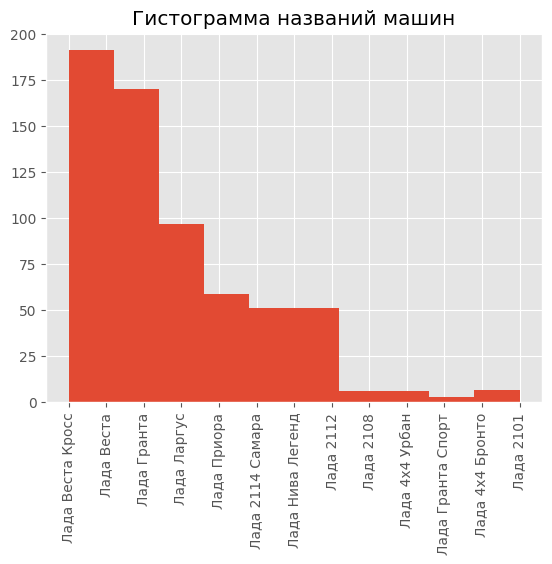

In [28]:
#судя по количеству наблюдений, да, потому что количество машин всего около 640, а "классов" всего 13, посмотрим на гистограмму распределения
plt.hist(df['Название машины'])
plt.xticks(rotation=90)
plt.title('Гистограмма названий машин')
plt.show()
#для большей части названий наблюдений достаточно, однако для 5 наименований маловато, позже решим, что с этим делать

In [10]:
#дропнем ссылку как неинформативный для регрессии признак:
df_no_link = df.drop(['Ссылка'], axis=1)
df_link = df['Ссылка']
#разделение выборки на признаки и таргет будет позже, когда преобразуем столбик с названиями машин

#Создание базовой регрессии (D)
(в этом разделе создадим модель со всеми исходными (и даже чуть больше) признаками и посмотрим, есть ли в этом смысл, а также очистим данные от выбросов)

In [11]:
#попробуем преобразовать название машин в бинарные признаки через onehotencoder, код частично взят из https://habr.com/ru/articles/666234/
enc = OneHotEncoder(sparse=False)

encoded_column = enc.fit_transform(df_no_link[['Название машины']])
one_hot_df = pd.DataFrame(encoded_column, columns=[f'Название машины_{i}' for i in range(len(df_no_link['Название машины'].unique()))])
df_enc = pd.concat([df_no_link.drop(['Название машины'], axis=1), one_hot_df], axis=1)

df_enc.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,Привод_задний,...,Название машины_3,Название машины_4,Название машины_5,Название машины_6,Название машины_7,Название машины_8,Название машины_9,Название машины_10,Название машины_11,Название машины_12
0,1350000,122.0,86684.0,1.8,2018,0,1,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1350000,122.0,77400.0,1.8,2019,0,0,1,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,950000,90.0,9200.0,1.6,2023,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1165000,122.0,84594.0,1.8,2019,0,0,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1145000,122.0,58195.0,1.8,2019,0,1,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Заметим, что количество признаков увеличилось на 11, это получилось так: убрав название машин из признаков изначально получим 42 признака (df_no_link), прибавим 12 наименований (13-1 из-за того, что можно "отнормировать" к одному названию) и получим 54 (или +11) признака

##Дропаем выбросы

Теперь давайте дропнем выбросы. Все что составляет менее 1% выборки будет отправлено в дроп (по бинарным переменным).

In [12]:
df_enc.describe().loc['mean'][df_enc.describe().loc['mean']<0.01]

Привод_задний                              0.00624
Тип кузова_минивэн                         0.00156
Цвет_желтый                                0.00312
Цвет_золотистый                            0.00156
Цвет_фиолетовый                            0.00156
0_Мощность двигателя не совпадает с ПТС    0.00468
Название машины_0                          0.00624
Название машины_1                          0.00936
Название машины_4                          0.00468
Название машины_5                          0.00936
Название машины_9                          0.00468
Name: mean, dtype: float64

In [13]:
df_enc.drop(df_enc.describe().loc['mean'][df_enc.describe().loc['mean']<0.01].index.to_list(), axis=1, inplace=True)

Итак, дропаем все что составляет менее 1% выборки:

1) Машины с задним приводом

2) Несколько названий машин

3) Несколько цветов

4) И мощность двигателя не совпадает

In [14]:
#теперь у нас есть огромная таблица с кучей признаков. попробуем прогнать регрессию, что называется, в лоб,
#чтобы прикинуть на глаз, есть ли мультиколлинеарность или все и так хорошо
df_y = df_enc['Цена']
df_X = df_enc.drop(['Цена'], axis=1)

X = sm.add_constant(df_X)
model_0 = sm.OLS(df_y, X).fit()

print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     156.3
Date:                Fri, 10 May 2024   Prob (F-statistic):          1.76e-292
Time:                        18:13:50   Log-Likelihood:                -8374.9
No. Observations:                 641   AIC:                         1.684e+04
Df Residuals:                     598   BIC:                         1.703e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Несмотря на то, что R^2 оказался довольно большим, мы видим, что некоторые коэффициенты оказались отрицательными, хотя по идее они должны вносить положительный вклад (например, объем двигателя). Более того, в категориальных группах (например, типов кузовов и названий машин) отрицательными являются все коэффициенты, а значит в таких группах никакой признак не является "предпочтительным", то есть вся группа вносит отрицательный вклад (это так не должно работать).

Получается, что так как многие коэффициенты очень большие по модулю и отрицательные, причем их отрицательность противоречит экономической интуиции, то, скорее всего, в данных присутствует мультиколлинеарность.

In [15]:
#проверим предположение о мультиколлинеарности, посчитав VIF-ы

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
vif["features"] = df_X.columns

vif = vif.round(1)
vif

,VIF,features
0,340.4,Мощность
1,5.3,Пробег
2,2026.0,Объём двигателя
3,2077.6,Год
4,3.9,Коробка передач_вариатор
5,28.6,Коробка передач_механика
6,3.5,Коробка передач_робот
7,325.2,Привод_передний
8,1.3,Тип кузова_джип/suv 5 дв.
9,19.9,Тип кузова_лифтбек


In [16]:
#посмотрим VIF-ы в виде массива
vif['VIF'].values

array([3.4040e+02, 5.3000e+00, 2.0260e+03, 2.0776e+03, 3.9000e+00,
       2.8600e+01, 3.5000e+00, 3.2520e+02, 1.3000e+00, 1.9900e+01,
       9.8200e+01, 6.8300e+01, 5.7000e+00, 4.4900e+01, 1.6000e+00,
       1.8000e+00, 3.2000e+00, 3.9000e+00, 3.5000e+00, 2.5000e+00,
       5.7000e+00, 7.8000e+00, 3.7000e+00, 8.6000e+00, 1.2600e+01,
       3.4000e+00, 1.6420e+02, 7.9000e+00, 2.4000e+00, 1.9000e+00,
       4.0000e+00, 1.0200e+01, 2.0000e+00, 3.8000e+00, 6.5000e+00,
       1.6200e+01, 3.7400e+01, 1.4700e+01, 4.4900e+01, 2.8500e+01,
       4.3000e+00, 1.6400e+01])

Заметим, что много VIF-ов стремятся к бесконечности, особенно это касается названия машин и типов кузовов. В принципе, это было понятно еще из таблички с результатами оценивания регрессии, потому что именно эти группы имели самые подозрительные коэффициенты. Также присутствует много больших VIF-ов, с ними тоже что-то надо делать.

Получилось, что в данных и правда присутствует мультиколлинеарность, значит базовая регрессия со всеми признаками едва ли хорошая идея. Попробуем что-то придумать!

Самое логичное - отредактировать признаки так, чтобы снизить мультиколлинеарность и сделать их более агрегированными, общими. Приглашаем в следующий раздел!

#Вторичный анализ данных (E)
(в этом разделе отредактируем признаки, уберем самые скоррелированные и постараемся починить мультиколлинеарность как сможем)

In [17]:
#для начала еще раз выведем признаки с большими VIF-ми, потому что именно в этом множестве и содержатся скоррелированные переменные
#положим, что VIF чрезмерный, если он больше 5
vif[vif['VIF']>5]

,VIF,features
0,340.4,Мощность
1,5.3,Пробег
2,2026.0,Объём двигателя
3,2077.6,Год
5,28.6,Коробка передач_механика
7,325.2,Привод_передний
9,19.9,Тип кузова_лифтбек
10,98.2,Тип кузова_седан
11,68.3,Тип кузова_универсал
12,5.7,Тип кузова_хэтчбек 3 дв.


<Axes: >

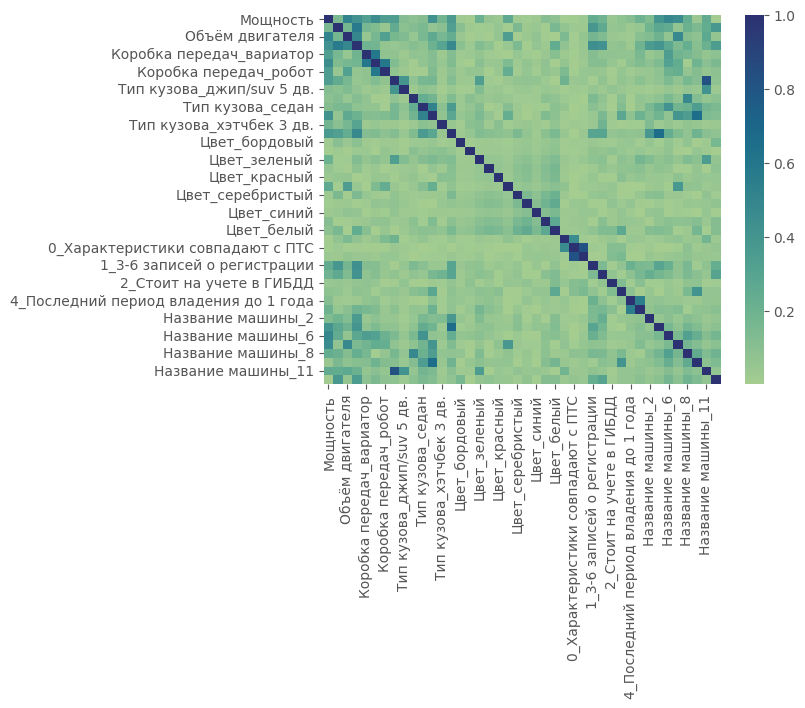

In [18]:
#теперь посмотрим на корреляции переменных
#значения возьмем по модулю, потому что важно само отклонение, а не его знак (ну он тоже важен, но пока возьмем значение)
corr_matrix_abs = df_X.corr().abs()

sns.heatmap(corr_matrix_abs, cmap="crest")

По тепловой матрице видим, что в целом корреляции не везде большие, однако присутствуют отдельные "подозрительные" точки, которые надо отправить в корреляционный патруль и разобраться, что с ними делать.

In [19]:
#выведем 10 самых скоррелированных пар
n_E = 10

corr_matrix = df_X.corr()
mask_E = np.triu(np.ones_like(corr_matrix_abs, dtype=bool), k=1)
corr_values = corr_matrix_abs.where(mask_E)
pairs = corr_values.unstack().sort_values(ascending=False).dropna()
pairs_top_10 = pairs[:10]

print(f"Топ {n_E} пар наиболее скоррелированных признаков:")
for index, pair in enumerate(pairs_top_10.index, start=1):
    col1, col2 = pair
    val = corr_matrix[col1][col2]
    print(f"{index}. {col1} и {col2}: {val:.2f}")

Топ 10 пар наиболее скоррелированных признаков:
1. Название машины_11 и Привод_передний: -0.82
2. 0_Цвет не совпадает с ПТС и 0_Характеристики совпадают с ПТС: -0.81
3. Название машины_3 и Тип кузова_хэтчбек 5 дв.: 0.66
4. Название машины_10 и Тип кузова_универсал: 0.66
5. Коробка передач_механика и Коробка передач_вариатор: -0.59
6. Коробка передач_робот и Коробка передач_механика: -0.59
7. Год и Пробег: -0.57
8. 4_Последний период владения до 6 лет и 4_Последний период владения до 1 года: -0.55
9. Тип кузова_универсал и Тип кузова_седан: -0.52
10. Объём двигателя и Мощность: 0.51


In [20]:
#а теперь выведем все пары, у которых корреляция больше 0.5 по модулю:
pairs_thres = pairs[pairs>0.5]

print(f"Пары с корреляцией по модулю >0.5:")
for index, pair in enumerate(pairs_thres.index, start=1):
    col1, col2 = pair
    val = corr_matrix[col1][col2]
    print(f"{index}. {col1} и {col2}: {val:.2f}")

Пары с корреляцией по модулю >0.5:
1. Название машины_11 и Привод_передний: -0.82
2. 0_Цвет не совпадает с ПТС и 0_Характеристики совпадают с ПТС: -0.81
3. Название машины_3 и Тип кузова_хэтчбек 5 дв.: 0.66
4. Название машины_10 и Тип кузова_универсал: 0.66
5. Коробка передач_механика и Коробка передач_вариатор: -0.59
6. Коробка передач_робот и Коробка передач_механика: -0.59
7. Год и Пробег: -0.57
8. 4_Последний период владения до 6 лет и 4_Последний период владения до 1 года: -0.55
9. Тип кузова_универсал и Тип кузова_седан: -0.52
10. Объём двигателя и Мощность: 0.51


Итак, нужно что-то сделать с названиями машин, типами кузовов, приводами и кое-чем еще.

Приступим!

In [21]:
#еще раз выведем все колонки, чтобы понять, какие из них можно агрегировать и выделить общую бинарную переменную:
df_X.columns

Index(['Мощность', 'Пробег', 'Объём двигателя', 'Год',
       'Коробка передач_вариатор', 'Коробка передач_механика',
       'Коробка передач_робот', 'Привод_передний', 'Тип кузова_джип/suv 5 дв.',
       'Тип кузова_лифтбек', 'Тип кузова_седан', 'Тип кузова_универсал',
       'Тип кузова_хэтчбек 3 дв.', 'Тип кузова_хэтчбек 5 дв.', 'Цвет_бордовый',
       'Цвет_голубой', 'Цвет_зеленый', 'Цвет_коричневый', 'Цвет_красный',
       'Цвет_оранжевый', 'Цвет_серебристый', 'Цвет_серый', 'Цвет_синий',
       'Цвет_черный', 'Цвет_белый', '0_Модель не совпадает с ПТС',
       '0_Характеристики совпадают с ПТС', '0_Цвет не совпадает с ПТС',
       '1_3-6 записей о регистрации', '1_более 6 записей о регистрации',
       '2_Стоит на учете в ГИБДД', '3_Не был во владении у юр. лица',
       '4_Последний период владения до 1 года',
       '4_Последний период владения до 6 лет', 'Название машины_2',
       'Название машины_3', 'Название машины_6', 'Название машины_7',
       'Название машины_8', 'Назва

Еще раз напомним о списке дропнутых дамми, которые здесь, как то самое ружье на стене, выстреливают: ***'0_Год не совпадает с ПТС', '1_1-2 записей о регистрации', '2_Не стоит на учете в ГИБДД', '3_Был во владении у юр. лица', '4_Последний период владения больше 6 лет', 'Коробка передач_АКПП', 'Привод_4WD', 'Тип кузова_джип/suv 3 дв.', 'Цвет_бежевый'.***

**Итак, исходя из логических соображений, можно предположить, что релевантны следующие преобразования:**




1) **Удалить в целом признак "Название машины"**.
Во-первых, данная категория сильно повышает мультиколлинеарность, так как хорошо описывается другими переменными (например, мощностью, коробкой передач, объемом двигателя, приводом и кузовом. Да, кузовы могут быть разными у модели, но все равно варианты ограничены: едва ли мини купер можно купить в комплектации минивэна.
Во-вторых, у данной переменной нет экономическо-исследовательского смысла с точки зрения построения функции гедонистического спроса. У нас присутствует 13 машин, каждая из которых, по факту, есть совокупность упомянутых выше характеристик (концептуально 13 (хотя бы такого порядка) совокупностей). Проще говоря, каждая X_i модель в конкретной комплектации стоит на рынке (отличие первичного от вторичного в данном контексте минимально) Y_i рублей, эта цена известна и стабильна, а значит анализировать влияние названия машины нет смысла (оно и так известно).

2) **В группе коробок передач сделать бинарную переменную "Механика или не механика"**. Предполагается выделение именно механики, потому что она сильнее всего отличается от остальных типов, а они, в свою очередь, довольно похожи друг на друга.

3) **В группе приводов сделать бинарную переменную "Передний или не передний"**. Выделение основывается на том, что передний привод сильнее всего отличается от остальных в представленности в наблюдениях и лучше выделяет класс условно "обычных" машин от "необычных" в данной группе.

4) **В группе кузовов сделать несколько бинарных переменных, которые обозначают "Джип", "Лифтбек", "Хэтчбек", "Минивэн", "Седан" и "Универсал".**
Было решено укрупнить отдельные группы (по дверям) и оставить типы как бинарные переменные. Почему? Потому что одна и та же модель машины может быть представлена в разных кузовах, причем данный признак хоть и является вариативным (можно купить схожую машину, но с другим кузовом), но эта вариативность ограничена (на вторичном рынке подобрать такой же пробег или юридическую историю сложнее), а также признак не может быть изменен как, например, цвет.
То есть основная причина рассмотрения данного признака это существенное различие комплектаций на первичном и вторичном рынках (на вторичном нельзя (очень сложно) купить такую же, но с другим кузовом).

5) **В группе цветов сделать бинарную переменную "Классический цвет или нет"**. К классическим цветам отнесем черный, белый, серый и серебристый. На эти 4 цвета приходится около 70% всех автомобилей в России (см. https://news.drom.ru/79717.html)

6) **В группе юридических аспектов автомобиля (ПТС) сделать бинарную переменную "Есть ли несовпадения или нет"**. Тогда любое нарушение и несовпадение будет означать 1, а их полное отсутствие 0.

7) **В группе записей о регистрации сделать бинарную переменную "1-2 записей о регистрации"**. Тогда оставшиеся два признака, а именно "3-6 записей о регистрации" и "Больше 6 записей о регистрации" будут смерджены в один и означать значение переменной 0.

8) **В группе о последнем периоде владения сделать бинарную переменную "Последний период владения до 1 года"**. Тогда оставшиеся два признака, а именно "Последний период владения от 1 до 6 лет" и "Последний период владения до 6 лет" будут смерджены в один и означать значение переменной 0.

9) Остальные признаки оставить без изменений, так как они относительно независимы и могут рассматриваться отдельно от подавляющего большинства первичных и вторичных характеристик объявления.

Теперь внесем упомянутые коррективы!


In [22]:
#удаляем название машины:
df_X_new = df_X.iloc[:, :-8]

#сделаем бинарную переменную механика или нет:
df_X_new.rename(columns = {'Коробка передач_механика':'КП механическая'}, inplace = True)
df_X_new.drop(['Коробка передач_вариатор', 'Коробка передач_робот'], axis=1, inplace=True)

#сделаем бинарную переменную передний или задний привод:
df_X_new.rename(columns = {'Привод_передний':'Привод передний'}, inplace = True)

#сделаем бинарные переменные о типах кузовов:
kuz = ['Кузов_лифтбек', 'Кузов_седан', 'Кузов_универсал', 'Кузов_хэтчбек'] #список с типами понадобится ниже

df_X_new.rename(columns = {'Тип кузова_лифтбек':'Кузов_лифтбек'}, inplace = True) #тут просто переименовываем столбцы
df_X_new.rename(columns = {'Тип кузова_седан':'Кузов_седан'}, inplace = True)
df_X_new.rename(columns = {'Тип кузова_универсал':'Кузов_универсал'}, inplace = True)

df_X_new['Кузов_хэтчбек'] = df_X['Тип кузова_хэтчбек 5 дв.'] + df_X['Тип кузова_хэтчбек 3 дв.'] #здесь мерджим в одну группу хэтчбеки
df_X_new.drop(['Тип кузова_хэтчбек 5 дв.', 'Тип кузова_хэтчбек 3 дв.'], axis=1, inplace=True)

df_X_new['Кузов_джип'] = df_X['Тип кузова_джип/suv 5 дв.'] + np.prod([df_X_new[i]==0 for i in kuz], axis=0) #восстановим дропнутый класс джипов
df_X_new.drop(['Тип кузова_джип/suv 5 дв.'], axis=1, inplace=True)

#сделаем бинарную переменную о цвете:
cl_col = ['Цвет_белый', 'Цвет_черный', 'Цвет_серебристый', 'Цвет_серый']
colors = ['Цвет_бордовый', 'Цвет_голубой', 'Цвет_зеленый',
          'Цвет_коричневый', 'Цвет_красный', 'Цвет_оранжевый',
          'Цвет_серебристый', 'Цвет_серый', 'Цвет_синий',
          'Цвет_черный', 'Цвет_белый']

df_X_new['Классический цвет'] = np.sum([df_X_new[i] for i in cl_col], axis=0)
df_X_new.drop(colors, axis=1, inplace=True)

#сделаем бинарную переменную о существовании несовпадений:
df_X_new.rename(columns = {'0_Характеристики совпадают с ПТС':'ПТС без нарушений'}, inplace = True)
df_X_new.drop(['0_Модель не совпадает с ПТС', '0_Цвет не совпадает с ПТС'], axis=1, inplace=True)

#сделаем бинарную переменную о записях о регистрации:
df_X_new['1-2 записей о регистрации'] = 1 - df_X_new['1_3-6 записей о регистрации'] - df_X_new['1_более 6 записей о регистрации']
df_X_new.drop(['1_3-6 записей о регистрации', '1_более 6 записей о регистрации'], axis=1, inplace=True)

#сделаем бинарную переменную о последнем периоде владения:
df_X_new.rename(columns = {'4_Последний период владения до 1 года':'Последний период владения до 1 года'}, inplace = True)
df_X_new.drop('4_Последний период владения до 6 лет', axis=1, inplace=True)

#для красоты переименуем оставшиеся колонки:
df_X_new.rename(columns = {'2_Стоит на учете в ГИБДД':'Стоит на учете в ГИБДД'}, inplace = True)

df_X_new['Был во владении у юр. лица'] = 1 - df_X_new['3_Не был во владении у юр. лица']
df_X_new.drop('3_Не был во владении у юр. лица', axis=1, inplace=True)

df_X_new = df_X_new[['Мощность', 'Объём двигателя', 'Пробег', 'Год',
                    'КП механическая', 'Привод передний', 'Стоит на учете в ГИБДД', 'Классический цвет',
                    '1-2 записей о регистрации', 'Был во владении у юр. лица', 'Последний период владения до 1 года',
                    'Кузов_универсал', 'Кузов_седан', 'Кузов_лифтбек', 'Кузов_хэтчбек', 'Кузов_джип']]

df_X_new.head()

,Мощность,Объём двигателя,Пробег,Год,КП механическая,Привод передний,Стоит на учете в ГИБДД,Классический цвет,1-2 записей о регистрации,Был во владении у юр. лица,Последний период владения до 1 года,Кузов_универсал,Кузов_седан,Кузов_лифтбек,Кузов_хэтчбек,Кузов_джип
0,122.0,1.8,86684.0,2018,1,1,1,1,1,0,0,1,0,0,0,0
1,122.0,1.8,77400.0,2019,0,1,1,1,1,0,0,1,0,0,0,0
2,90.0,1.6,9200.0,2023,1,1,1,1,1,0,0,0,1,0,0,0
3,122.0,1.8,84594.0,2019,0,1,0,1,1,1,0,1,0,0,0,0
4,122.0,1.8,58195.0,2019,1,1,0,1,1,0,0,0,1,0,0,0


Получается, что имеем следующие переменные:

***'Мощность', 'Пробег', 'Объём двигателя', 'Год'*** - количественные переменные

***'КП механическая', 'Привод передний', 'Стоит на учете в ГИБДД', 'Классический цвет', '1-2 записей о регистрации', 'Был во владении у юр. лица' и 'Последний период владения до 1 года'*** - бинарные переменные

***'Кузов_лифтбек', 'Кузов_седан', 'Кузов_универсал', 'Кузов_хэтчбек' и  'Кузов_джип'*** - бинарные переменные общего признака "Тип кузова" с нулевым вариантом "Минивен"

На самом деле переменная "Год" тоже вносит очень большой вклад в мультиколлинеарность, потому что хорошо выражается через другие переменные. Например, количество регистраций, время последнего пользования, пробег и тд. Поэтому год тоже дропнем для лучшего качества модели.

In [23]:
#прогоним регрессию по новой таблице:

X_new = sm.add_constant(df_X_new.drop(['Год'], axis=1))
model_new = sm.OLS(df_y, X_new).fit()

print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     157.8
Date:                Fri, 10 May 2024   Prob (F-statistic):          6.39e-201
Time:                        18:13:53   Log-Likelihood:                -8668.9
No. Observations:                 641   AIC:                         1.737e+04
Df Residuals:                     625   BIC:                         1.744e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [24]:
vif_new = pd.DataFrame()
vif_new["VIF"] = [variance_inflation_factor(df_X_new.drop(['Год'], axis=1).values, i) for i in range(df_X_new.drop(['Год'], axis=1).shape[1])]
vif_new["features"] = df_X_new.drop(['Год'], axis=1).columns

vif_new = vif_new.round(1)
vif_new

,VIF,features
0,172.5,Мощность
1,306.3,Объём двигателя
2,4.3,Пробег
3,7.4,КП механическая
4,137.5,Привод передний
5,3.6,Стоит на учете в ГИБДД
6,3.5,Классический цвет
7,6.1,1-2 записей о регистрации
8,1.4,Был во владении у юр. лица
9,1.4,Последний период владения до 1 года


VIF-ы стали лучше. Присутствует несколько очень больших значений, но они хотя бы не бесконечность, теперь будем думать дальше. Для начала давайте посмотрим на корреляции.

<Axes: >

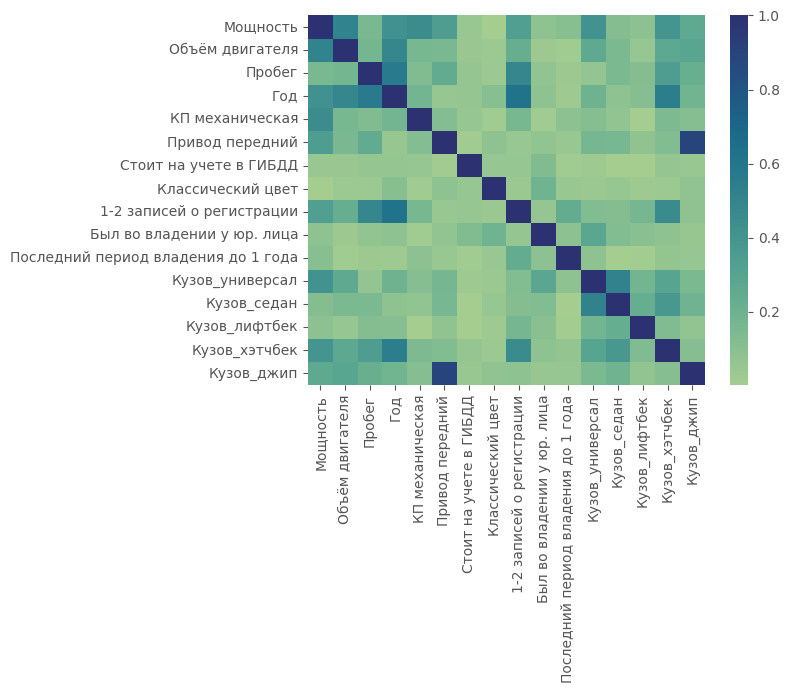

In [25]:
corr_matrix_abs_new = df_X_new.corr().abs()

sns.heatmap(corr_matrix_abs_new, cmap="crest")

In [26]:
corr_matrix_new = df_X_new.corr()
mask_new = np.triu(np.ones_like(corr_matrix_abs_new, dtype=bool), k=1)
corr_values_new = corr_matrix_abs_new.where(mask_new)
pairs_new = corr_values_new.unstack().sort_values(ascending=False).dropna()
pairs_top_10_new = pairs_new[:10]

print(f"Топ 10 пар наиболее скоррелированных признаков:")
for index, pair in enumerate(pairs_top_10_new.index, start=1):
    col1, col2 = pair
    val = corr_matrix_new[col1][col2]
    print(f"{index}. {col1} и {col2}: {val:.2f}")

Топ 10 пар наиболее скоррелированных признаков:
1. Кузов_джип и Привод передний: -0.89
2. 1-2 записей о регистрации и Год: 0.62
3. Год и Пробег: -0.57
4. Кузов_хэтчбек и Год: -0.55
5. Кузов_седан и Кузов_универсал: -0.52
6. Объём двигателя и Мощность: 0.51
7. 1-2 записей о регистрации и Пробег: -0.49
8. Год и Объём двигателя: 0.49
9. Кузов_хэтчбек и 1-2 записей о регистрации: -0.46
10. КП механическая и Мощность: -0.45


Итак, корреляции все еще очень большие как и некоторые VIF-ы, однако сейчас уже понятно, что надо делать. В целом, главный инсайт такой: сделать общую регрессию с такими признаками сложно, возможно, вообще невозможно, поэтому нужно конкретизировать модели, для которых мы строим регрессии и признаки, которые мы используем. Происходит это из-за того, что у нас слишком разные машины и признаки сильно варьируются для них. Джипам, например, свойственен соответствующий кузов, но вместе переднего привода там полный (4WD) и так далее.

В общем, бейзлайн сделан, дальше нужно лучше специфицировать модели и признаки.


Главное проблема сейчас в том, что некоторые признаки слишком скоррелированы, а данные слишком разнородны, поэтому для построения адекватной модели нужно либо сделать модель для отдельных названий, либо как-то ограничить факторы тактико-технических характеристик.

Попробуем применить оба метода:

#Метод главных компонент
(в этом разделе применим метод МГК для ТТХ машин и попробуем сфокусироваться на вторичных факторах, например, пробеге, учете в гибдд и тд)

Так как при непосредственном дропе первичных признаков произойдет сильное смещение коэффициентов, то их нужно как-то "изолировать" и "оградить". Давайте попробуем применить несколько главных компонент для агрегации признаков.


---


Вариант 1:



Во-первых, сделаем компоненту среди признаков "Пробег", "Год" и "1-2 записей о регистрации", потому что это переменные означают использованность модели.

Во-вторых, сделаем компоненту среди признаков "Мощность", "Объём двигателя" и "КП механическая", и "Привод передний", они отвечают за технические характеристики.


---
Вариант 2:

Так же сделаем компоненту среди признаков об использованности, но теперь к техническим характеристикам включим еще и типы кузовов.

Можно попробовать, но делать это не будем, так как не совсем понятно, во что тогда сольются компоненты и что останется.

In [27]:
#Вариант 1:
# Выделение колонок "мощность" и "производительность" для применения PCA
comp_1_1 = df_X_new[['Пробег', 'Год', '1-2 записей о регистрации']]
comp_1_2 = df_X_new[["Мощность", "Объём двигателя", "КП механическая", 'Привод передний']]

pca_1_1 = PCA(n_components=1)
pca_1_2 = PCA(n_components=1)
pca_1_1.fit(comp_1_1)
pca_1_2.fit(comp_1_2)

X_comp_1_1 = pca_1_1.transform(comp_1_1)
X_comp_1_2 = pca_1_2.transform(comp_1_2)

df_X_new['Comp_1_1'] = X_comp_1_1
df_X_new['Comp_1_2'] = X_comp_1_2


X_pca_1 = sm.add_constant(df_X_new.drop(['Пробег', 'Год', '1-2 записей о регистрации', "Мощность", "Объём двигателя", "КП механическая", 'Привод передний'], axis=1))
model_pca_1 = sm.OLS(df_y, X_pca_1).fit()

print(model_pca_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     179.0
Date:                Fri, 10 May 2024   Prob (F-statistic):          1.96e-185
Time:                        18:13:55   Log-Likelihood:                -8716.2
No. Observations:                 641   AIC:                         1.746e+04
Df Residuals:                     629   BIC:                         1.751e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Коэффициенты при компонентах в данном случае неинтерпретируемые, зато значимые, как и значими некоторые кузовы. Вторичные признаки в данном анализе получились незначимыми, поэтому, вероятно, все-таки ключевыми характеристиками являются первичные.